In [1]:
# Nama     : Reza Aditya Prabowo
# NIM      : A11.2022.14201
# Kelompok : A11.4419

# Praktek Jupyterlab
# =============================
# ***Universitas Dian Nuswantoro***

In [2]:
# Melakukan Load Library 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Memasukkan Dataset
# Nama dataframe kita adalah df yang berisi data dari data.csv
# Hanya menggunakan kolom horsepower dan price
df = pd.read_csv('data.csv', usecols=['horsepower', 'price'])

In [4]:
# Melihat 5 baris teratas dari data
# Independent variabel(x) adalah horsepower
# Dependent variabel(y) adalah price
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [5]:
# Mengetahui jumlah kolom dan baris dari data
# Data kita mempunya 2 kolom dengan 200 baris
df.shape

(200, 2)

In [6]:
# Melihat Info Data
# Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
# Mendiskripsikan Data
# Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [8]:
# Mencari dan menangani missing values
# Ternyata data kita tidak ada missing values
df.isnull().sum()

horsepower    0
price         0
dtype: int64

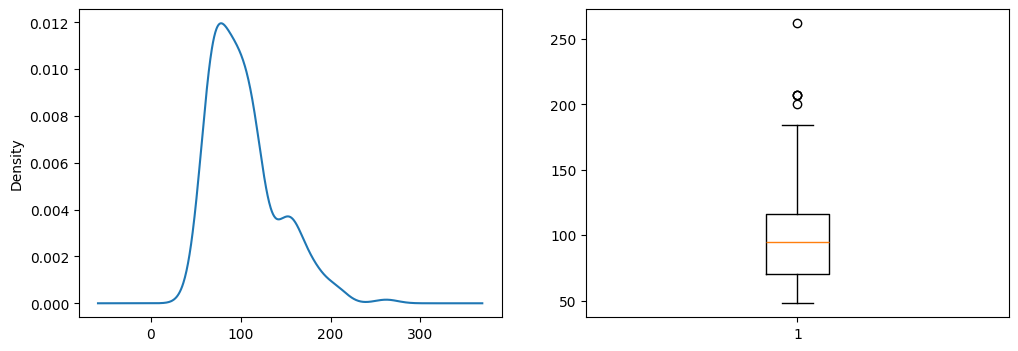

In [9]:
# Melakukan EDA
# Univariate analysis horsepower
# Melihat distribusi dari horsepower
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

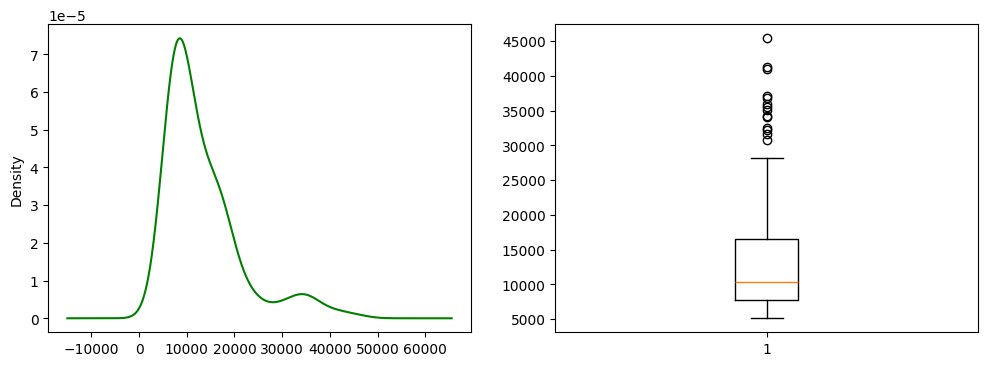

In [10]:
# Melakukan EDA
# Univariate analysis price
# Melihat distribusi dari price
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

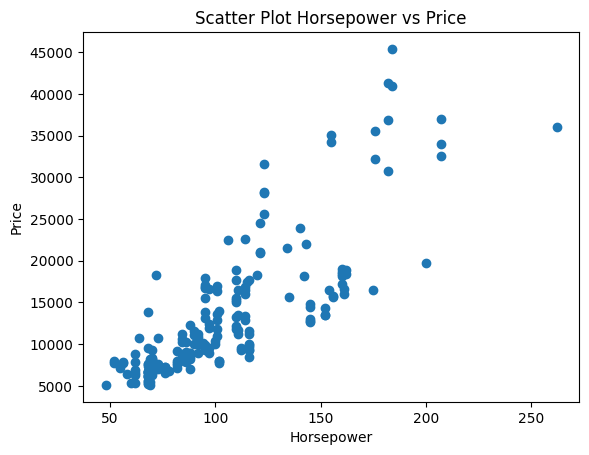

In [11]:
# Bivariate analysis horsepower dan price
# Menggunakan scatter plot
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [12]:
# Mengetahui nilai korelasi dari horsepower dan price
# Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


In [13]:
# Recall data kita
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [14]:
# Pertama, buat variabel x dan y
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [15]:
# Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
# Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [17]:
# Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [18]:
# Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[172.73269793]]
[-4699.36305622]


In [19]:
# Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.6215879928598478

Text(0.5, 1.0, 'Plot Horsepower vs Price')

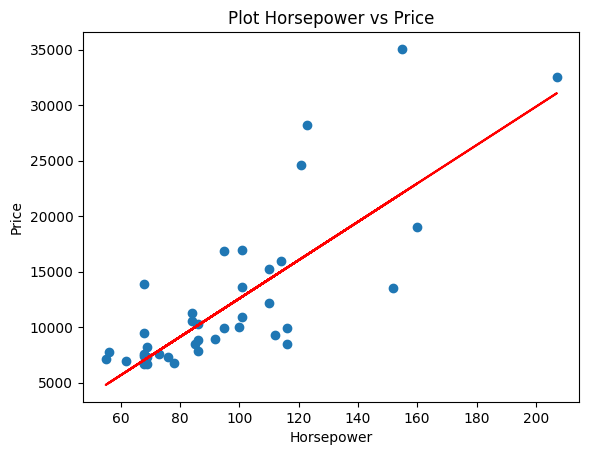

In [20]:
# Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
# Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [21]:
# Prediksi harga mobil dengan horsepower 100
lin_reg.predict([[100]])

array([[12573.90673672]])

In [22]:
# Prediksi harga mobil dengan horsepower 150
lin_reg.predict([[150]])

array([[21210.54163318]])

In [23]:
# Prediksi harga mobil dengan horsepower 200
lin_reg.predict([[200]])

array([[29847.17652965]])